In [1]:
# Imports
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline as backend_inline

backend_inline.set_matplotlib_formats("svg")


# Pytorch device specific configuration
# Pytorch Gpu Configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.set_default_device(device)

# # Font update global for all plots
# plt.rcParams.update({"font.size": 18})

import copy

In [2]:
# create a model
net = nn.Sequential(
    nn.Linear(2, 8),  # input layer
    nn.Linear(8, 1),  # hidden layer
    nn.Linear(1, 1),  # output unit
)

In [3]:
### NO RANDOM SEED

# create a "template" network
net_noseed = copy.deepcopy( net )

# update the weights
for p in net_noseed.named_parameters():
  if 'weight' in p[0]:
    nn.init.xavier_normal_(p[1].data)

In [4]:
### RANDOM SEED 1a

# create a "template" network
net_rs1a = copy.deepcopy(net)

# set the seed to 1
torch.manual_seed(1)

# update the weights
for p in net_rs1a.named_parameters():
    if "weight" in p[0]:
        nn.init.xavier_normal_(p[1].data)

In [5]:
### RANDOM SEED 2

# create a "template" network
net_rs2 = copy.deepcopy(net)

# set the seed to 2
torch.manual_seed(2)

# update the weights
for p in net_rs2.named_parameters():
    if "weight" in p[0]:
        nn.init.xavier_normal_(p[1].data)

In [6]:
### RANDOM SEED 1b

# create a "template" network
net_rs1b = copy.deepcopy(net)

# set the seed to 1
torch.manual_seed(1)

# update the weights
for p in net_rs1b.named_parameters():
    if "weight" in p[0]:
        nn.init.xavier_normal_(p[1].data)

In [8]:
# initialize empty arrays
w_ns = np.array([])
w_1a = np.array([])
w_2 = np.array([])
w_1b = np.array([])

# loop over layers in the models
for i in range(3):

    # extract the vectorized weights matrices
    w_ns = np.append(w_ns, net_noseed[i].weight.view(-1).cpu().detach().numpy())
    w_1a = np.append(w_1a, net_rs1a[i].weight.view(-1).cpu().detach().numpy())
    w_2 = np.append(w_2, net_rs2[i].weight.view(-1).cpu().detach().numpy())
    w_1b = np.append(w_1b, net_rs1b[i].weight.view(-1).cpu().detach().numpy())

# check the vector
w_ns

array([-0.86122406,  0.00658834, -0.11451266, -0.56885207, -0.10320999,
        0.09907866, -0.2643871 ,  0.21220459,  0.17821391, -0.69153333,
       -0.36184105, -0.30383518, -0.1687824 , -0.56667936, -0.31515792,
        0.31469268,  0.79642731,  0.53294164, -0.26335698,  0.35219678,
        0.43824875,  0.1170702 ,  0.37863022, -0.17488451, -0.26770896])

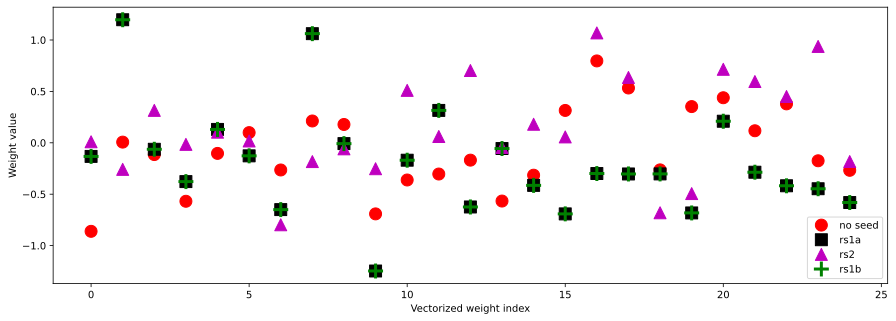

In [9]:
# plotting

fig = plt.figure(figsize=(15, 5))

plt.plot(w_ns, "ro", markersize=12, label="no seed")
plt.plot(w_1a, "ks", markersize=12, label="rs1a")
plt.plot(w_2, "m^", markersize=12, label="rs2")
plt.plot(w_1b, "g+", markersize=15, label="rs1b", markeredgewidth=3)
plt.legend()
plt.xlabel("Vectorized weight index")
plt.ylabel("Weight value")

plt.show()